### Pregunta de Negocio - Analistes de Finances i Risc Crediticio

> En quina **mesura** els clients amb **saldos més baixos** estan en **més risc d'incompliment de crèdit**, i com hem d'ajustar les nostres polítiques de crèdit per mitigar aquest risc?
>

### Carga de datos

In [1]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

In [2]:
df_original = pd.read_csv(r"C:\Users\maria\Github repos\repos_externos\ProjecteData\Equip_9\Data\df_original.csv")

### Extracto del EDA

<Axes: >

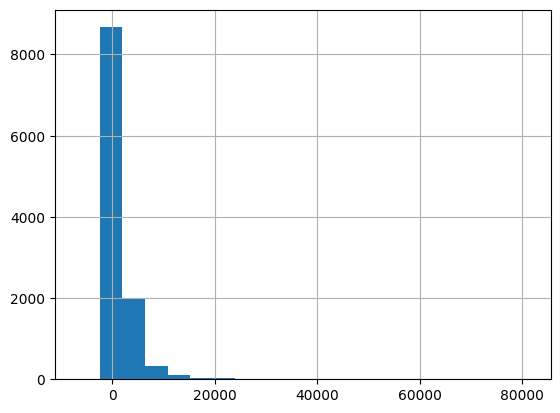

In [3]:
df_original['balance'].hist(bins=20)

count    11163.000000
mean      1528.611484
std       3225.278053
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.500000
max      81204.000000
Name: balance, dtype: float64


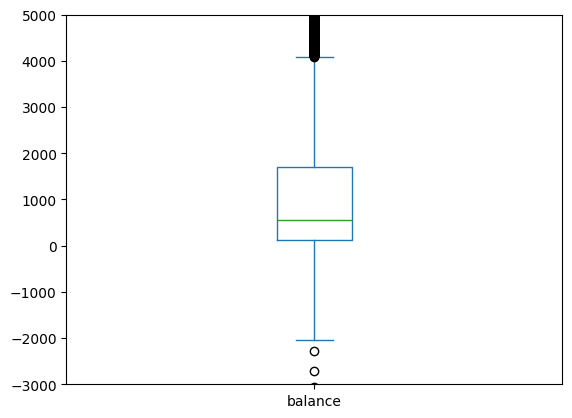

In [4]:
print(df_original['balance'].describe())
df_original['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

          count         mean          std     min     25%    50%      75%  \
deposit                                                                     
no       5873.0  1280.227141  2933.411934 -6847.0   64.00  414.0  1324.00   
yes      5290.0  1804.369754  3500.781617 -3058.0  210.25  733.0  2159.75   

             max  
deposit           
no       66653.0  
yes      81204.0  


<Axes: xlabel='balance', ylabel='Count'>

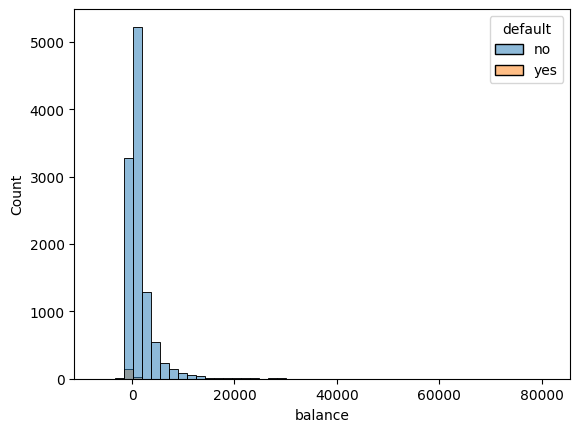

In [5]:
print(df_original.groupby('deposit')['balance'].describe())
sns.histplot(data=df_original, x='balance', hue='default', bins=50)

In [ ]:
df_original['balance_group'] = pd.cut(df_original['balance'],
                                      bins=[-7000, 0, 500, 1500, 5000, 82000],
                                      labels=['Deute', '0-500', '500-1500', '1500-5000', '5000+'])

df_original.groupby('balance_group')['default'].value_counts(normalize=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_12660\2394613538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_original.groupby('balance_group')['default'].value_counts(normalize=True)


balance_group  default
Deute          no         0.929549
               yes        0.070451
0–500          no         0.986879
               yes        0.013121
500–1500       no         0.995564
               yes        0.004436
1500–5000      no         0.999572
               yes        0.000428
5000+          no         0.998703
               yes        0.001297
Name: proportion, dtype: float64